### <span style = "color:DarkMagenta;font-size:20px"> Fashion MNIST </span>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('fashion_mnist.csv')

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
data.shape

(60000, 785)

In [6]:
X = data.drop(columns = ['label'])
y = data['label']

In [7]:
X.shape

(60000, 784)

In [8]:
y.shape

(60000,)

#### Reshape X to (len(X), 28,28,1)

In [9]:
X = X.values.reshape((len(X),28,28,1))

In [10]:
X.shape

(60000, 28, 28, 1)

#### Normalise the data

In [11]:
X = X/255

In [12]:
X

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

#### Plot some of the figures

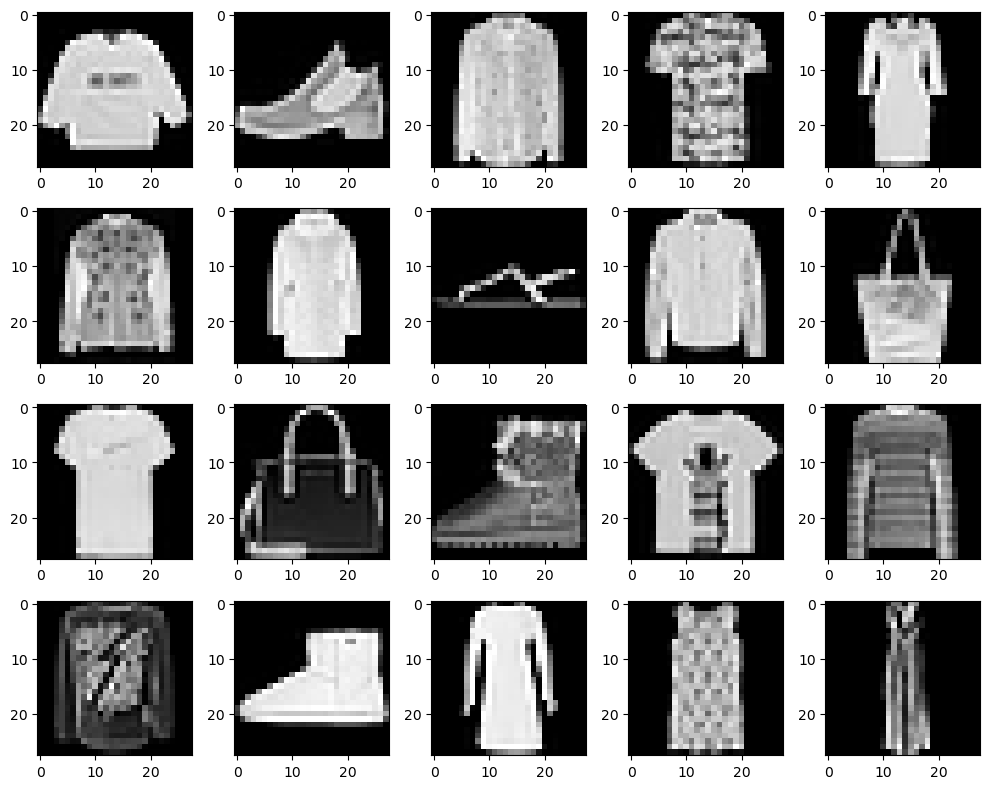

In [39]:
plt.figure(figsize = (10,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X[i], cmap ='gray')
    
plt.tight_layout()

#### Split the dataset into Training and Testing set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

#### Check the shape of X_train and X_test

In [15]:
X_train.shape

(48000, 28, 28, 1)

In [16]:
X_test.shape

(12000, 28, 28, 1)

#### Create a keras Sequential model with 2 hidden layers

In [17]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape = (28,28)),
                  keras.layers.Dense(128, activation="relu"),
                  keras.layers.Dense(64, activation = "relu"),
                  keras.layers.Dense(64, activation = "tanh"),
                  keras.layers.Dense(10,activation="sigmoid")
])

#### Compile Keras Model

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

#### Check summary of the model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [20]:
model.fit(X_train,y_train, epochs = 5, validation_split=0.05)

Epoch 1/5
1425/1425 [==============================] - 9s 5ms/step - loss: 0.5164 - accuracy: 0.8129 - val_loss: 0.4200 - val_accuracy: 0.8400
Epoch 2/5
1425/1425 [==============================] - 7s 5ms/step - loss: 0.3829 - accuracy: 0.8614 - val_loss: 0.3745 - val_accuracy: 0.8562
Epoch 3/5
1425/1425 [==============================] - 5s 4ms/step - loss: 0.3456 - accuracy: 0.8743 - val_loss: 0.3554 - val_accuracy: 0.8633
Epoch 4/5
1425/1425 [==============================] - 5s 4ms/step - loss: 0.3243 - accuracy: 0.8819 - val_loss: 0.3565 - val_accuracy: 0.8654
Epoch 5/5
1425/1425 [==============================] - 5s 4ms/step - loss: 0.3065 - accuracy: 0.8867 - val_loss: 0.3449 - val_accuracy: 0.8671


#### Evaluate the model

In [21]:
model.evaluate(X_train, y_train)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.3010 - accuracy: 0.8873


[0.301003098487854, 0.8872708082199097]

#### Make predictions

In [22]:
prediction = model.predict(X_test)

375/375 [==============================] - 1s 2ms/step


In [23]:
prediction

array([[0.67673266, 0.17849322, 0.99890107, ..., 0.05993958, 0.07654049,
        0.01040134],
       [0.97681946, 0.34433836, 0.5766987 , ..., 0.0323487 , 0.08318947,
        0.07461466],
       [0.14929861, 0.87891203, 0.32954842, ..., 0.00729064, 0.40993425,
        0.05745626],
       ...,
       [0.4246767 , 0.20983918, 0.8059592 , ..., 0.00479193, 0.15625767,
        0.1730439 ],
       [0.14824481, 0.06231321, 0.962009  , ..., 0.00718972, 0.3914425 ,
        0.02870873],
       [0.4798431 , 0.2155505 , 0.7460921 , ..., 0.00238602, 0.7468123 ,
        0.07550234]], dtype=float32)

#### Create a dictionary with Key from 0 to 1 and values of labels

In [36]:
labels_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
labels_dict 

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

#### Store all predicted values as numbers in a list

In [25]:
predicted_values = [np.argmax(i) for i in prediction]

#### Plot the first few figures in X_test along with its labels from y_test

In [44]:
y_test

0        2
1        3
2        3
3        7
4        2
        ..
11995    4
11996    0
11997    6
11998    4
11999    6
Name: label, Length: 12000, dtype: int64

In [26]:
y_test.reset_index(drop = True, inplace = True)

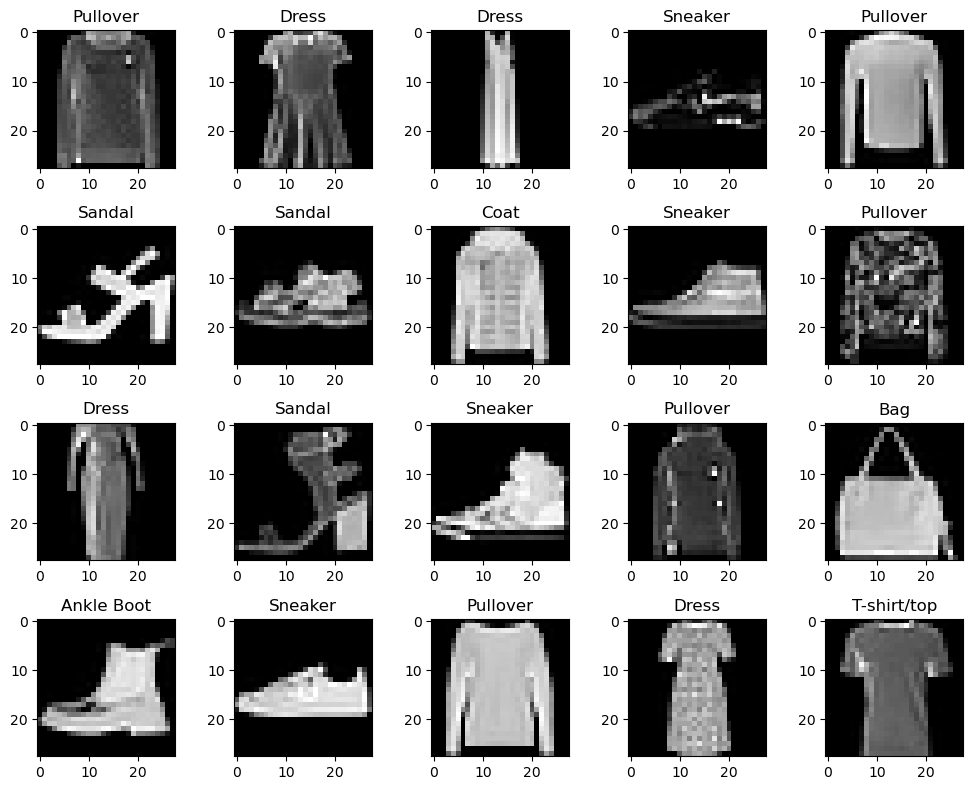

In [43]:
plt.figure(figsize = (10,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i], cmap = 'gray')
    plt.title(labels_dict[y_test[i]])

plt.tight_layout()


#### Now plot the figures from X-test with labels from our Predicted values

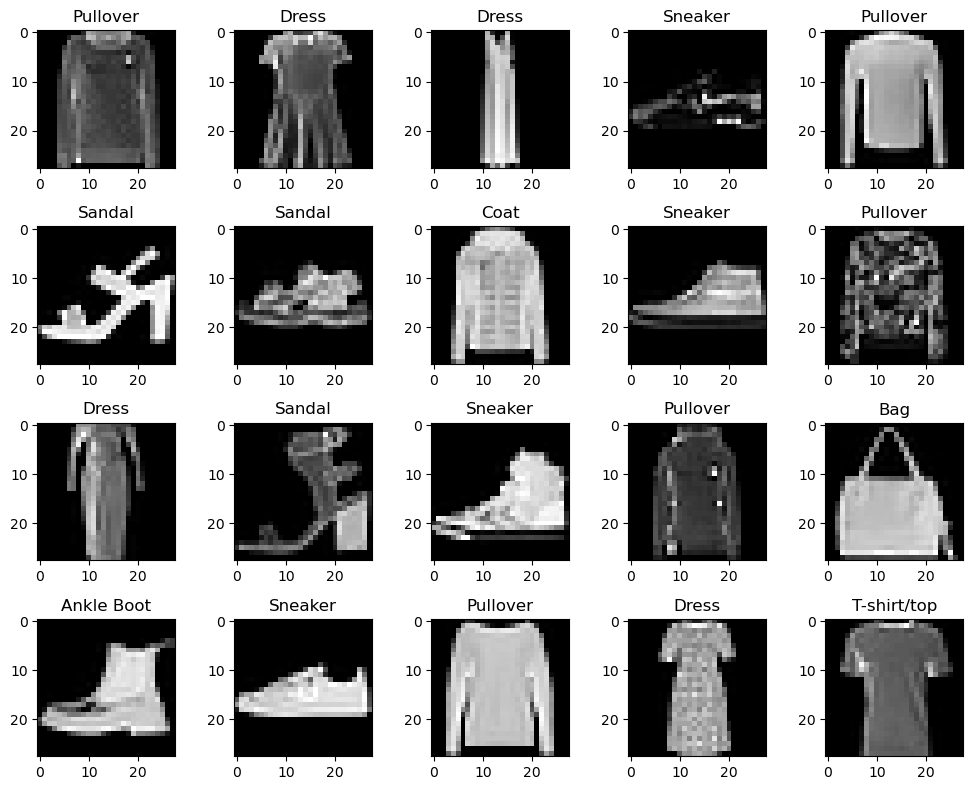

In [47]:
plt.figure(figsize = (10,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i], cmap = 'gray')
    plt.title(labels_dict[predicted_values[i]])
    
plt.tight_layout()


#### Plot the accuracy of our prediction

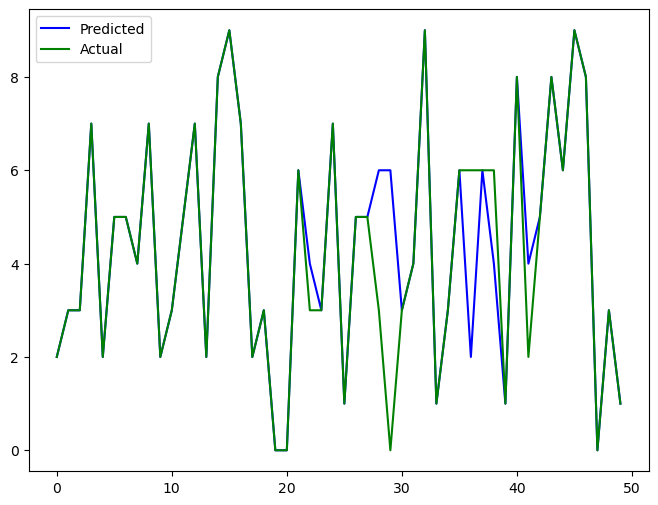

In [29]:
a = range(len(predicted_values))
plt.figure(figsize = (8,6))
plt.plot(a[:50], predicted_values[:50], color = 'blue')
plt.plot(a[:50], y_test[:50], color = 'green')
plt.legend(['Predicted', 'Actual'])
plt.show()

#### Plot confusion matrix on a heatmap

Text(70.72222222222221, 0.5, 'Actual Values')

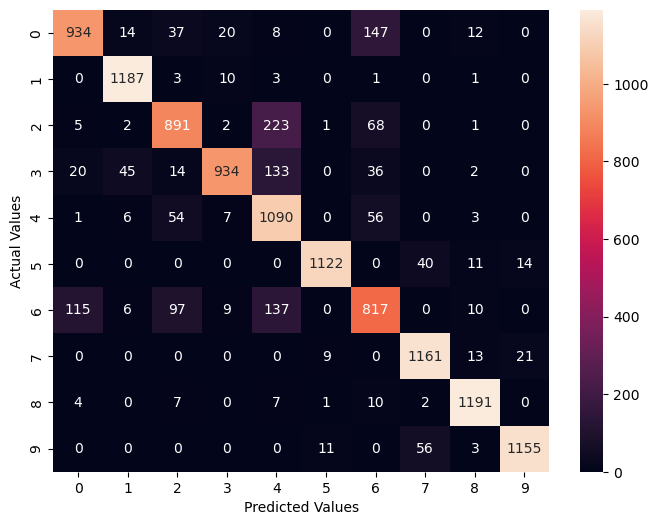

In [30]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,predicted_values), annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')